In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read
Product data:

In [4]:
df = pd.read_csv('../data/ammonia_DE.csv', index_col=0, sep=';')
df.index = df.index.map(lambda x: pd.to_datetime(x, format='%d.%m.%Y'))

In [15]:
df['Ammonia avg. value of trades EUR/t'] = (
    df['Ammonia import value, EUR'] + df['Ammonia export value, EUR']
) / (
    df['Ammonia imports, t'] + df['Ammonia exports, t']
)

Gas prices:

In [16]:
gas = pd.read_csv('../data/gas_prices_TTF.csv', index_col=0, parse_dates=True)['Price']

In [17]:
gasm = gas.resample('1m', label='left').mean()
gasm.index = gasm.index + pd.Timedelta('1d')

In [18]:
df['Natural gas price TTF, EUR/MWh'] = gasm

In [19]:
gas_old = pd.read_csv('../data/Dutch TTF Natural Gas Futures Historical Data.csv', index_col=0)['Price']
gas_old.index = pd.to_datetime(gas_old.index)
gas_mean = gas_old[gas_old.index.year.isin([2019, 2020])].mean()

# Plot

85.86095833333363
-212.42666666666614
-0.4038600481286705
-0.2098682278983817
-92.557
169.80499999999995


C:\Users\c.stiewe\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


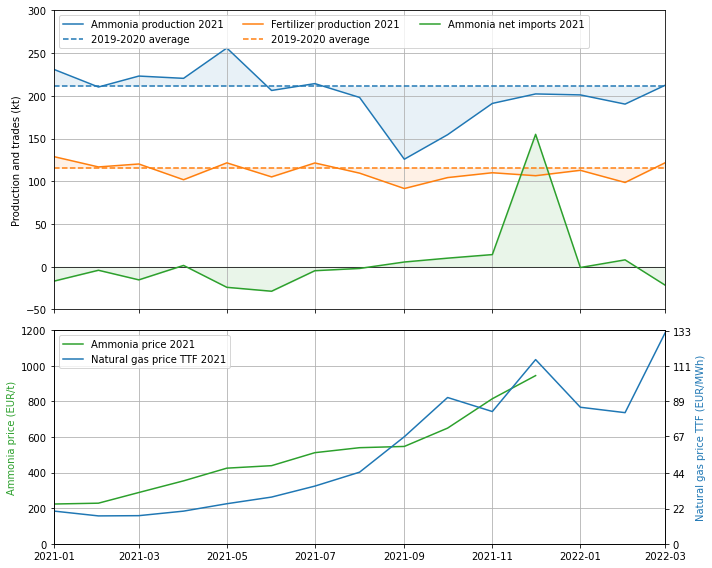

In [20]:
fig, (ax, ax1) = plt.subplots(2, 1, figsize=(10,8), sharex='col', gridspec_kw={'height_ratios': [4.2,3]})

dfa = df.copy().iloc[:24]/1000
dfx = df.copy().iloc[24:]/1000
x = dfx.index

ax.axhline(0, color='black', linewidth=0.7)

ax.plot(x, dfx['Ammonia production DE, t'], label='Ammonia production 2021')
ax.axhline(dfa['Ammonia production DE, t'].mean(), linestyle='--', label='2019-2020 average')
ax.fill_between(x, dfx['Ammonia production DE, t'], dfa['Ammonia production DE, t'].mean(), alpha=0.1)

print((dfx['Ammonia production DE, t'] - dfa['Ammonia production DE, t'].mean()).iloc[:5].sum())
print((dfx['Ammonia production DE, t'] - dfa['Ammonia production DE, t'].mean()).iloc[7:].sum())
print((dfx['Ammonia production DE, t'].min() - dfa['Ammonia production DE, t'].mean())/dfa['Ammonia production DE, t'].mean())

ax.plot(x, dfx['Fertiliser production DE, t'], label='Fertilizer production 2021')
ax.axhline(dfa['Fertiliser production DE, t'].mean(), linestyle='--', color='tab:orange', label='2019-2020 average')
ax.fill_between(x, dfx['Fertiliser production DE, t'], dfa['Fertiliser production DE, t'].mean(), color='tab:orange', alpha=0.1)

print((dfx['Fertiliser production DE, t'].min() - dfa['Fertiliser production DE, t'].mean())/dfa['Fertiliser production DE, t'].mean())

ax.plot(x, dfx['Ammonia net imports DE, t'], color='tab:green', label='Ammonia net imports 2021')
ax.fill_between(x, dfx['Ammonia net imports DE, t'], 0, color='tab:green', alpha=0.1)

print(dfx['Ammonia net imports DE, t'].iloc[:7].sum())
print(dfx['Ammonia net imports DE, t'].iloc[8:].sum())

ax.set_xlim(x[0], x[-1])
ax.set_xticklabels([])
ax.set_ylim(-50,300)
ax.set_ylabel('Production and trades (kt)')

ax.legend(ncol=3, loc='upper left')
ax.grid()

dfa = df.iloc[:24]
dfx = df.iloc[24:]
x = dfx.index

plt.axhline(0, color='black', linewidth=0.7)
#plt.axhline(dfa['Ammonia import prices DE, EUR/t'].mean(), linestyle='--')

#handle_1, = ax1.plot(x, dfx['Ammonia avg. value of trades EUR/t'], color='tab:green')
#ax.axhline(dfa['Ammonia avg. value of trades EUR/t'].mean(), linestyle='--', color='tab:green')

dfx['Ammonia price CFR NWE, EUR/t'].iloc[:4] = dfx['Ammonia avg. value of trades EUR/t'].iloc[:4]
handle_1, = ax1.plot(x, dfx['Ammonia price CFR NWE, EUR/t'], color='tab:green')



plt.xlim(x[0], x[-1])
X = plt.gca().xaxis
X.set_major_locator(mdates.MonthLocator())
X.set_major_formatter(mdates.DateFormatter('%b'))
plt.ylim(0, 1200)
plt.ylabel('Ammonia price (EUR/t)', color='tab:green')

ax2 = ax1.twinx()
#handle_2, = ax2.plot(gas.index, gas) #
handle_2, = ax2.plot(x, dfx['Natural gas price TTF, EUR/MWh'])
#ax2.axhline(gas_mean, linestyle='--', color='tab:blue')
plt.ylim(0, 1200/9)
plt.yticks([int(round(x/9)) for x in range(0,1201,200)])
plt.ylabel('Natural gas price TTF (EUR/MWh)', color='tab:blue')

plt.legend([handle_1, handle_2], ['Ammonia price 2021', 'Natural gas price TTF 2021'])
ax1.grid()

plt.tight_layout()
plt.savefig(f'Ammonia.png', dpi=300)

In [12]:
print(dfx['Ammonia avg. value of trades EUR/t'])

2021-01-01     2234.917647
2021-02-01     2282.120539
2021-03-01     2881.916996
2021-04-01     3536.407075
2021-05-01     3866.763396
2021-06-01     3662.416217
2021-07-01     4396.970702
2021-08-01     4654.129093
2021-09-01     4942.831707
2021-10-01     5610.266579
2021-11-01     7274.769765
2021-12-01     4919.917378
2022-01-01    10212.517558
2022-02-01    10218.185298
2022-03-01    10261.536055
Name: Ammonia avg. value of trades EUR/t, dtype: float64


In [14]:
print(dfx['Ammonia price CFR NWE, EUR/t'])

2021-01-01    2234.917647
2021-02-01    2282.120539
2021-03-01    2881.916996
2021-04-01    3536.407075
2021-05-01     425.000000
2021-06-01     439.000000
2021-07-01     512.000000
2021-08-01     540.000000
2021-09-01     547.000000
2021-10-01     650.000000
2021-11-01     815.000000
2021-12-01     945.000000
2022-01-01            NaN
2022-02-01            NaN
2022-03-01            NaN
Name: Ammonia price CFR NWE, EUR/t, dtype: float64
